In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
heart_data=pd.read_csv('Heart_Disease_Prediction.csv')

In [3]:
heart_data.shape
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
heart_data['Chest pain type']=heart_data['Chest pain type'].astype('category')
heart_data['Chest pain type']=heart_data['Chest pain type'].cat.codes
heart_data['Heart Disease']=heart_data['Heart Disease'].astype('category')
heart_data['Heart Disease']=heart_data['Heart Disease'].cat.codes
heart_data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,3,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,2,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,1,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,2,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,0,120,269,0,2,121,1,0.2,1,1,3,0


In [5]:
heart_data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
heart_data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.166667,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.955322,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [7]:
cat_cols = ['Sex', 
    'Slope of ST',
    'Chest pain type',
    'Thallium']
target_col = 'Heart Disease' 

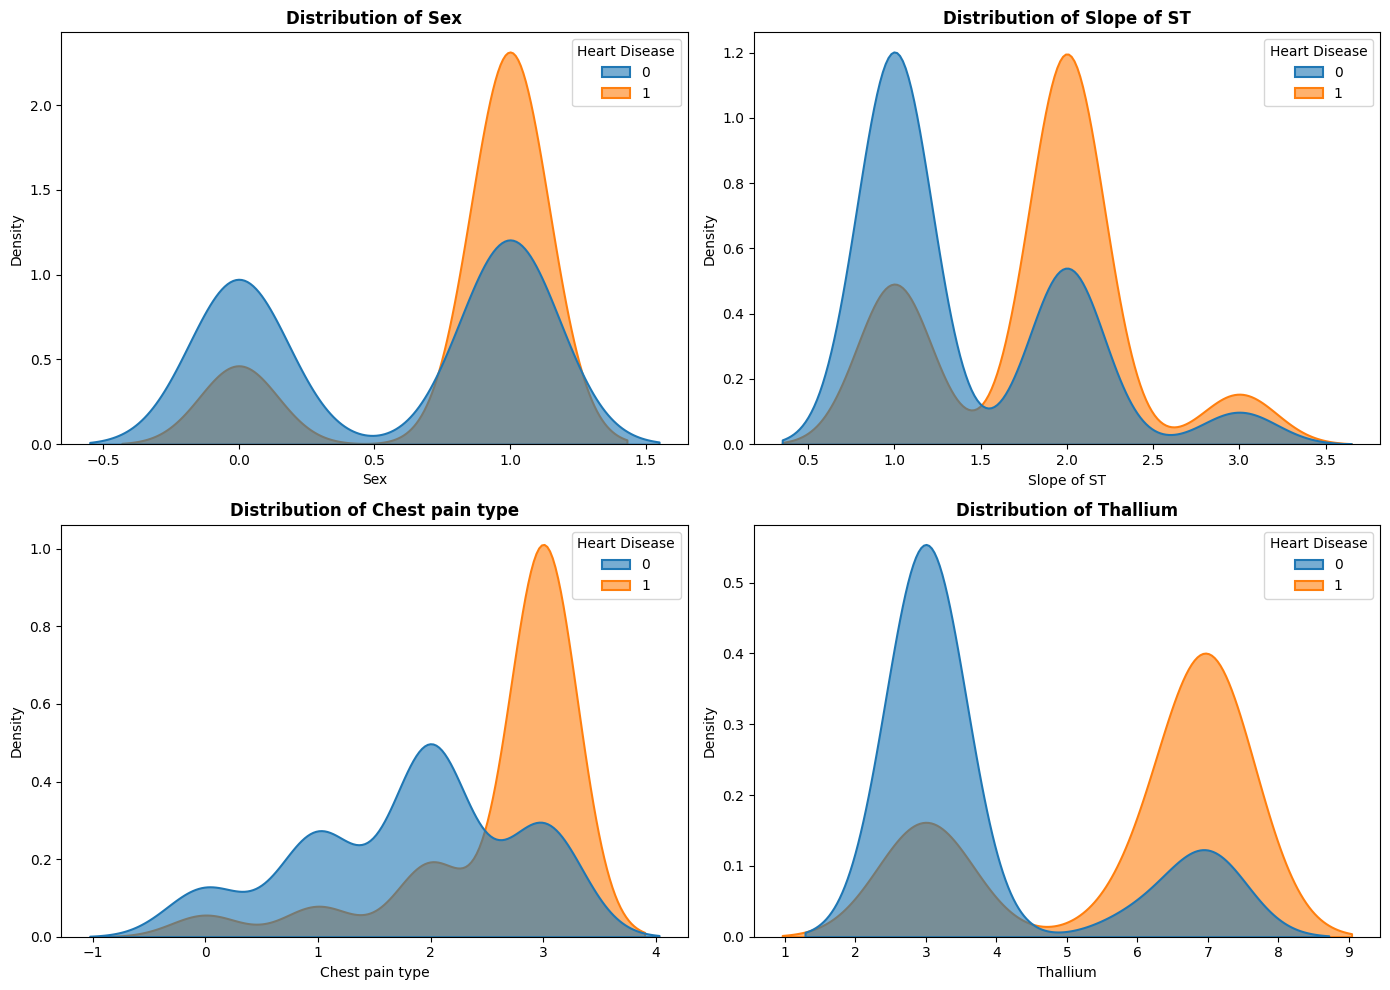

In [8]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=heart_data, 
        x=col, 
        hue=target_col, 
        fill=True, 
        common_norm=False, 
        alpha=0.6,          
        linewidth=1.5 )
    plt.title(f"Distribution of {col}", fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Density", fontsize=10)

plt.tight_layout()
plt.show()

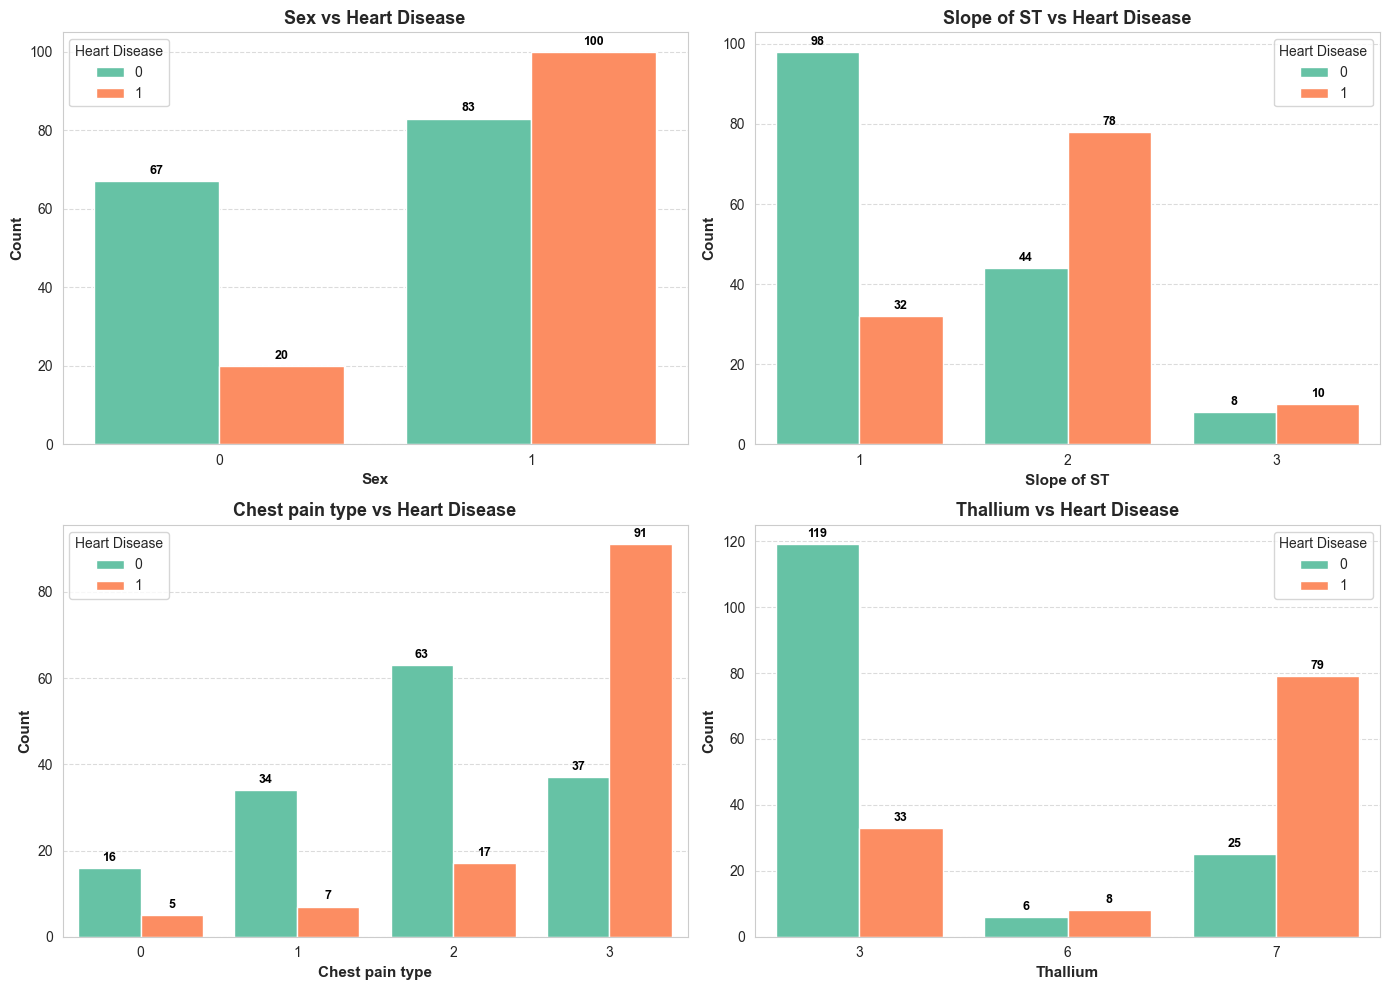

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Set2")   

plt.figure(figsize=(14, 10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(
        data=heart_data,
        x=col,
        hue=target_col,
        palette="Set2",
        saturation=1,       
    )
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3, color='black', weight='bold')

    plt.xlabel(col, fontsize=11, weight='bold')
    plt.ylabel("Count", fontsize=11, weight='bold')
    plt.title(f"{col} vs Heart Disease", fontsize=13, weight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

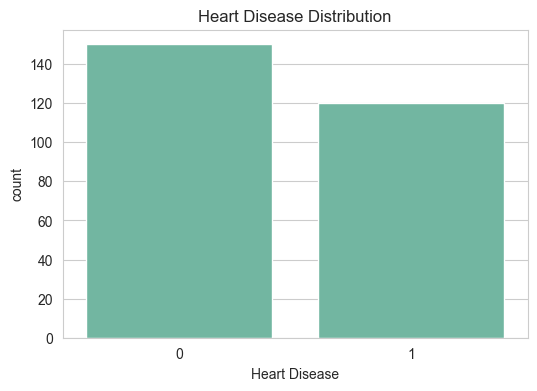

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Heart Disease', data=heart_data)
plt.title("Heart Disease Distribution")
plt.show()


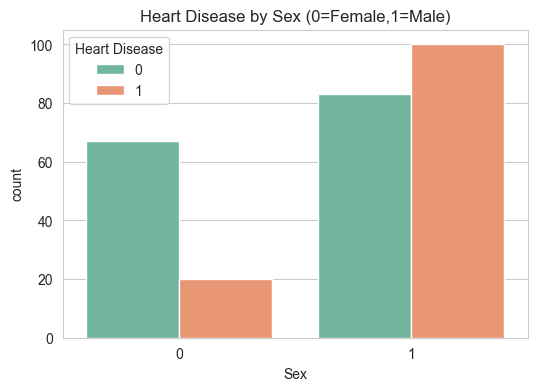

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Heart Disease', data=heart_data)
plt.title("Heart Disease by Sex (0=Female,1=Male)")
plt.show()

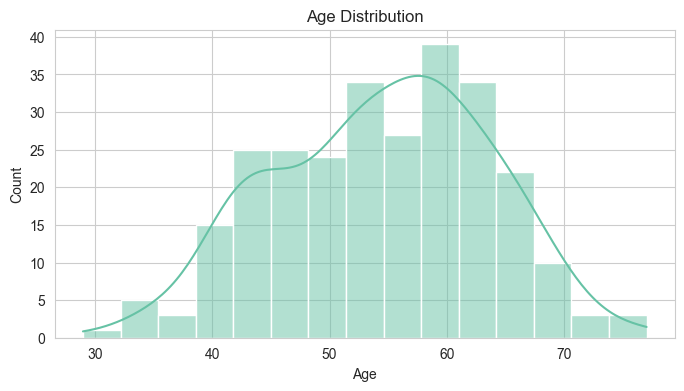

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(heart_data['Age'], bins=15, kde=True)
plt.title("Age Distribution")
plt.show()

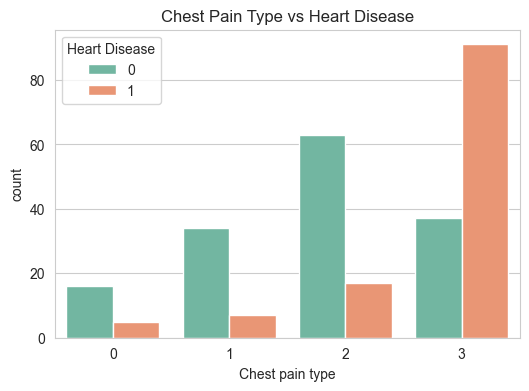

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Chest pain type', hue='Heart Disease', data=heart_data)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

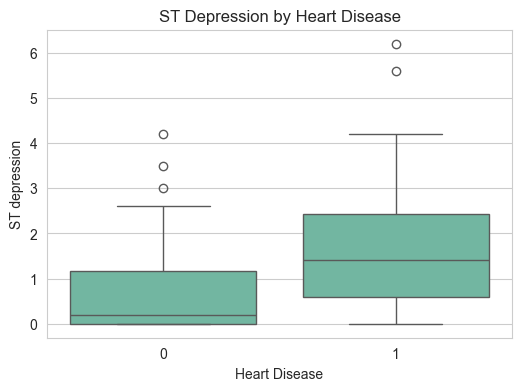

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Heart Disease', y='ST depression', data=heart_data)
plt.title("ST Depression by Heart Disease")
plt.show()

In [15]:
x=heart_data.drop(columns='Heart Disease')
y=heart_data['Heart Disease']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=0)

In [18]:
from sklearn.tree import DecisionTreeClassifier
heart_data = DecisionTreeClassifier(max_depth=5, random_state=42)
heart_data.fit(x_train, y_train)
y_pred_heart_data = heart_data.predict(x_test)
heart_data_acc = accuracy_score(y_test, y_pred_heart_data) * 100
print(f"Decision Tree Accuracy: {heart_data_acc:.2f}%")


Decision Tree Accuracy: 81.48%


In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
rf_acc = accuracy_score(y_test, y_pred_rf) * 100
print(f"Random Forest Accuracy: {rf_acc:.2f}%")


Random Forest Accuracy: 74.07%


In [20]:
log_model = LogisticRegression(max_iter=1000, solver='lbfgs')
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(x_test)
log_acc = accuracy_score(y_test, y_pred_log) * 100
print(f"Logistic Regression Accuracy: {log_acc:.2f}%")


Logistic Regression Accuracy: 77.78%


In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
knn_acc = accuracy_score(y_test, y_pred_knn) * 100
print(f"KNN Accuracy: {knn_acc:.2f}%")


KNN Accuracy: 70.37%


In [22]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
svm_acc = accuracy_score(y_test, y_pred_svm) * 100
print(f"SVM Accuracy: {svm_acc:.2f}%")

SVM Accuracy: 75.93%


In [23]:


input_data = (58,1,3,112,230,0,2,165,0,2.5,2,1,7)
input_data_as_numpy_array = np.array(input_data).reshape(1, -1)

models = {
    "Decision Tree": heart_data,
    "Random Forest": rf_model,
    "Logistic Regression": log_model,
    "KNN": knn_model,
    "SVM": svm_model
}


predictions = [model.predict(input_data_as_numpy_array)[0] for model in models.values()]


final_pred = 1 if predictions.count(1) > predictions.count(0) else 0
result = "does NOT have" if final_pred == 0 else "has"

print(f"Final Prediction: The person {result} heart disease.")


Final Prediction: The person has heart disease.


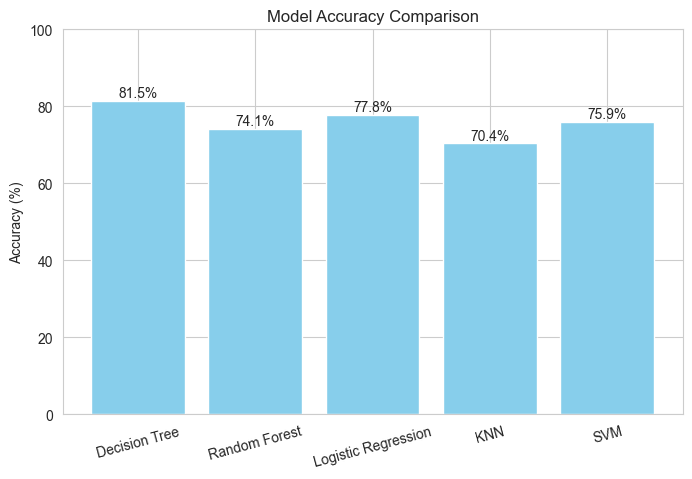

In [25]:
import matplotlib.pyplot as plt


models = ["Decision Tree", "Random Forest", "Logistic Regression", "KNN", "SVM"]
accuracies = [81.48,74.07,77.78,70.37,75.93]


plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color='skyblue')
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center')

plt.show()
